In [78]:
'''

Analysis of delivery data for jumpman23.
Dashboard of orders:
http://dashboard-jumpman.herokuapp.com/

'''

'\n\nAnalysis of delivery data for jumpman23.\nDashboard of orders:\nhttp://dashboard-jumpman.herokuapp.com/\n\n'

In [65]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
'''

Import Data from CSV

'''

df = pd.read_csv('analyze_me.csv')

'\n\nImport Data from CSV\n\n'

In [67]:
'''

dataframe size and shape

'''

df.shape

'\n\ndataframe size and shape\n\n'

(5983, 18)

In [68]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [69]:
'''

Column Data Types

'''


df.dtypes

'\n\nColumn Data Types\n\n'

delivery_id                              int64
customer_id                              int64
jumpman_id                               int64
vehicle_type                            object
pickup_place                            object
place_category                          object
item_name                               object
item_quantity                          float64
item_category_name                      object
how_long_it_took_to_order               object
pickup_lat                             float64
pickup_lon                             float64
dropoff_lat                            float64
dropoff_lon                            float64
when_the_delivery_started               object
when_the_Jumpman_arrived_at_pickup      object
when_the_Jumpman_left_pickup            object
when_the_Jumpman_arrived_at_dropoff     object
dtype: object

In [70]:
'''
The number of non-null values in each DataFrame column. 

'''

df.count()

'\nThe number of non-null values in each DataFrame column. \n\n'

delivery_id                            5983
customer_id                            5983
jumpman_id                             5983
vehicle_type                           5983
pickup_place                           5983
place_category                         5100
item_name                              4753
item_quantity                          4753
item_category_name                     4753
how_long_it_took_to_order              3038
pickup_lat                             5983
pickup_lon                             5983
dropoff_lat                            5983
dropoff_lon                            5983
when_the_delivery_started              5983
when_the_Jumpman_arrived_at_pickup     5433
when_the_Jumpman_left_pickup           5433
when_the_Jumpman_arrived_at_dropoff    5983
dtype: int64

In [71]:
'''
Notable missing data for the following columns:
place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order
when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup

'''


'\nNotable missing data for the following columns:\nplace_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order\nwhen_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup\n\n'

In [17]:
'''
Replace NaT values with average order time
Replace item quantity null values with most frequent value
'''

average_order_time = pd.Series(pd.to_timedelta(df.how_long_it_took_to_order))
average_order_time = average_order_time.mean()
df.how_long_it_took_to_order.fillna(average_order_time,inplace=True)
item_quantity = df.item_quantity.mode().astype(int)[0]
df.item_quantity.fillna(item_quantity,inplace=True)

'\nReplace NaT values with average order time\nReplace item quantity null values with most frequent value\n'

In [18]:
'''

Group by pickup place and find the most common order, category and place category. Update missing data accordingly.

'''

most_common_order = df.groupby(['pickup_place'])['item_name'].apply(lambda x: np.nan if x.isnull().all() else x.value_counts().index[0]).reset_index()
most_common_category = df.groupby(['pickup_place'])['item_category_name'].apply(lambda x: np.nan if x.isnull().all() else x.value_counts().index[0]).reset_index()
most_common_place_category = df.groupby(['pickup_place'])['place_category'].apply(lambda x: np.nan if x.isnull().all() else x.value_counts().index[0]).reset_index()

'\n\nGroup by pickup place and find the most common order, category and place category. Update missing data accordingly.\n\n'

In [19]:
'''

Left join the data to replace null values

'''


df.update(most_common_order,overwrite=False)
df.update(most_common_category,overwrite=False)
df.update(most_common_place_category,overwrite=False)

'\n\nLeft join the data to replace null values\n\n'

In [20]:
'''

We're missing several timestamps for arrival to pickup and leaving the pickup location.
I'm going to find the average time between dropoff and arrival. Using the average time interval
I can then update null values with a good estimate of arrival / leaving.

'''



df.pickup_to_arrival = pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff'])-pd.to_datetime(df['when_the_Jumpman_left_pickup'])
df.arrived_at_pickup = pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff'])-pd.to_datetime(df['when_the_Jumpman_arrived_at_pickup'])
pickup_to_arrival = df.pickup_to_arrival.mean()
arrived_at_pickup = df.arrived_at_pickup.mean()

"\n\nWe're missing several timestamps for arrival to pickup and leaving the pickup location.\nI'm going to find the average time between dropoff and arrival. Using the average time interval\nI can then update null values with a good estimate of arrival / leaving.\n\n"

/Users/andremansour/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
/Users/andremansour/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [21]:
'''

Update Missing Time Values

'''

df['when_the_Jumpman_left_pickup'].fillna(pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff']) - pickup_to_arrival,inplace=True)
df['when_the_Jumpman_arrived_at_pickup'].fillna(pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff']) - arrived_at_pickup,inplace=True)

'\n\nUpdate Missing Time Values\n\n'

In [22]:
df.count()

delivery_id                            5983
customer_id                            5983
jumpman_id                             5983
vehicle_type                           5983
pickup_place                           5983
place_category                         5180
item_name                              4829
item_quantity                          5983
item_category_name                     4829
how_long_it_took_to_order              5983
pickup_lat                             5983
pickup_lon                             5983
dropoff_lat                            5983
dropoff_lon                            5983
when_the_delivery_started              5983
when_the_Jumpman_arrived_at_pickup     5983
when_the_Jumpman_left_pickup           5983
when_the_Jumpman_arrived_at_dropoff    5983
dtype: int64

In [23]:
'''

We're still missing some data for place_category, item name and category name. I will leave it null for now since
I don't think it would help the analysis by giving it a median / modal value.

'''

"\n\nWe're still missing some data for place_category, item name and category name. I will leave it null for now since\nI don't think it would help the analysis by giving it a median / modal value.\n\n"

In [24]:
'''

Return Duplicate delivery id true / false


'''

df['duplicate'] = df['delivery_id'].duplicated()

'\n\nReturn Duplicate delivery id true / false\n\n\n'

In [25]:
'''

Dataframe of non-duplicates

'''


df1 = df[df['duplicate'] == False]

'\n\nDataframe of non-duplicates\n\n'

In [26]:
'''

Create a dataframe of all duplicates. I will add this dataframe to the original as second item, second item quantity etc..

'''

second_item_df = df.loc[df.duplicate == True  ,['delivery_id','item_name','item_quantity','item_category_name']] 

'\n\nCreate a dataframe of all duplicates. I will add this dataframe to the original as second item, second item quantity etc..\n\n'

In [27]:
'''

Rename columns to second item name, quantity etc..


'''

second_item_df = second_item_df.rename(columns={"item_name": "second_item_name", "item_quantity": "second_item_quantity","item_category_name":"second_item_category_name"})

'\n\nRename columns to second item name, quantity etc..\n\n\n'

In [28]:
df = pd.merge(df1,second_item_df,on = 'delivery_id',how='left')

In [29]:
df.count()

delivery_id                            5327
customer_id                            5327
jumpman_id                             5327
vehicle_type                           5327
pickup_place                           5327
place_category                         4561
item_name                              4173
item_quantity                          5327
item_category_name                     4173
how_long_it_took_to_order              5327
pickup_lat                             5327
pickup_lon                             5327
dropoff_lat                            5327
dropoff_lon                            5327
when_the_delivery_started              5327
when_the_Jumpman_arrived_at_pickup     5327
when_the_Jumpman_left_pickup           5327
when_the_Jumpman_arrived_at_dropoff    5327
duplicate                              5327
second_item_name                        769
second_item_quantity                    769
second_item_category_name               769
dtype: int64

'\n\nDeliveries by vehicle type\n\n'

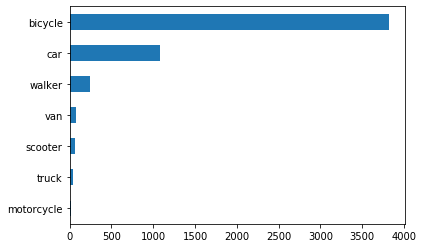

In [33]:
'''

Deliveries by vehicle type

'''

df.vehicle_type.value_counts().sort_values().plot(kind = 'barh')


'\n\nDeliveries by day of the week. Sunday is the busiest day of the week and Monday appears to dropoff\n\n'

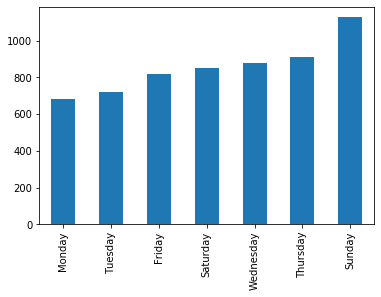

In [73]:
'''

Deliveries by day of the week. Sunday is the busiest day of the week and Monday appears to dropoff

'''


df['delivery_date'] = pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff'])
df['day_of_week'] = df['delivery_date'].dt.day_name()
df.day_of_week.value_counts().sort_values().plot(kind = 'bar')


In [77]:
'''
In order to perform more in-depth analysis of time and date trends I created the following dashboard of deliveries
by geo-location and time/day:
http://dashboard-jumpman.herokuapp.com/

The distribution appears to be bi-modal on weekdays. Orders hit the first peak from around lunch time between 10-2pm
and then taper off in the afternoon. The highest peak of the day is around dinner time between 5pm - 8pm.

On weekend days the distribiton is less bi-modal and we see few lunchtime orders. Dinner orders, however, spike for the
week.

In looking at the geo-data, the orders typically are concentrated in lower Manhattan. 


'''


SyntaxError: invalid syntax (<ipython-input-77-22c071973acf>, line 19)